<a href="https://colab.research.google.com/github/Souvik45/Movie_Rating_Prediction/blob/main/Movie_Rating_Prediction_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install scikit-surprise


In [2]:
#!pip install numpy==1.23.5
#!pip install --force-reinstall scikit-surprise

In [ ]:
'''🎬 Movie Rating Prediction using SVD

Goal: Predict how users would rate movies using collaborative filtering (SVD)
Dataset:MovieLens (ratings.csv)
Technique: Matrix Factorization with Surprise Library

Key Steps:
- Loaded and cleaned data
- Trained SVD model
- Evaluated with RMSE
- Made predictions
- Visualized rating distribution'''

In [16]:
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate,train_test_split
from surprise import accuracy
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('ratings.csv')
print(df.isnull().sum())
df.drop('timestamp',axis=1,inplace=True)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [4]:
#Display the first 5 rows
print("Dataset Preview: ")
print(df.head())

Dataset Preview: 
   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


In [5]:
#Preprocessing the Dataset
#Define a reader object for surprise
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(df[['userId','movieId','rating']],reader)

In [6]:
#Split Dataset into training and testing sets
trainset,testset=train_test_split(data,test_size=0.2,random_state=42)


In [7]:
#Build Collaborative Filtering Model using SVD
model=SVD()
model.fit(trainset)

In [15]:
#Evaluate the model
predictions = model.test(testset)
rmse=accuracy.rmse(predictions)
print(f"RMSE:{rmse:.4f}")

RMSE: 0.8801
RMSE:0.8801


In [17]:
pred_list=[(pred.uid,pred.iid,pred.r_ui,pred.est) for pred in predictions]   #uid=user Id,iid=item Id,r_ui=true rating
pred_df=pd.DataFrame(pred_list,columns=['userId','movieId','actual','predicted'])
print(pred_df.head())

   userId  movieId  actual  predicted
0     140     6765     3.5   3.476124
1     603      290     4.0   3.690350
2     438     5055     4.0   3.047415
3     433   164179     5.0   3.610628
4     474     5114     4.0   3.309826


In [11]:
#Make a prediction for a specific user and movie
user_id=196
movie_id=242
predicted_rating=model.predict(user_id,movie_id).est   #est=estimate
print(f"Predicted Rating for user {user_id} on Movie {movie_id}:{predicted_rating:.2f}")

Predicted Rating for user 196 on Movie 242:3.72


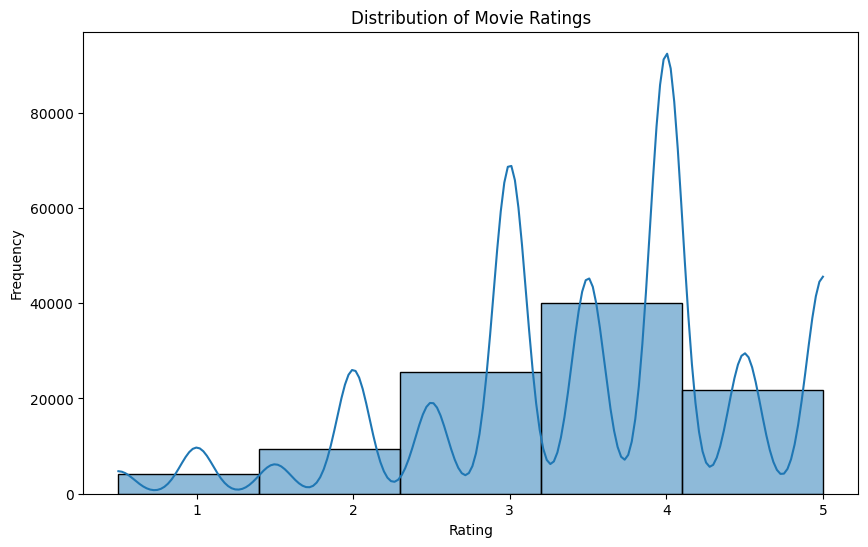

In [14]:
#Visualize Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['rating'],bins=5,kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()